<h1>Exercise set 1 (27/09 - 01/10)</h1>
<h2>Exercise 1.1: Shark-Tuna model</h2>
There is a population of prey (the tuna) and hunters (the sharks). Their populations are dependent on each other and are influenced by feedback.
The change of the population of tuna (T) and sharks (S) can be described by the following equations:

\begin{align*}
    T′&= 0.5T −0.01ST \\
    S′&= 0.005ST −0.2S
\end{align*}

We will model their population as a vector field using numpy and matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We use a meshgrid to create a 2D grid with a set amount of cells. In our case we choose a square grid of size 20x20. Then we define the equations and use matplotlibs quiver method to create the vector field. After this we simply lable our figure.

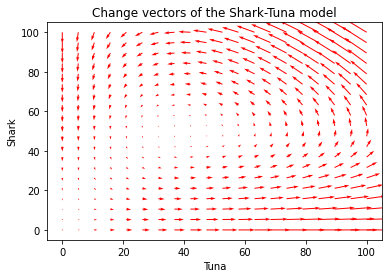

In [2]:
# Shark and Tuna
T, S = np.meshgrid(np.linspace(0, 100, 20),np.linspace(0, 100, 20))

dT = 0.5*T - 0.01*T*S
dS = 0.005*S*T - 0.2*S

plt.quiver(T, S, dT, dS, color='red')
plt.xlabel('Tuna')
plt.ylabel('Shark')
plt.title('Change vectors of the Shark-Tuna model')
plt.plot()
plt.show()

It is obvious that we can improve upon the previous figure. If we look closely, we see that there are very big and very small vectors. The small vectors are barely visible while the large ones overlap. We can solve this problem by normalising and using colour instead of size as an indicator for the magnitude of the vector.

There is one caveat though, when normalizing we have to bne careful not to divide by zero. To avoid this problem we use the `hypot()` function from numpy to filter out the vectors with a magnitude of zero.

After this procedure we simply have to creat a new figure, and pass a color map and the filtered magnitudes as extra arguments.

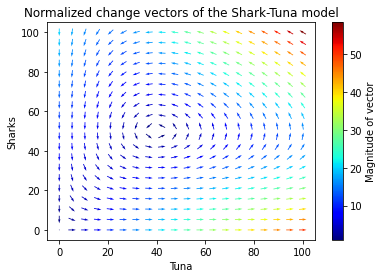

In [3]:
N = np.hypot(dT, dS)
N[N == 0] = 1

T_Normal = dT / N
S_Normal = dS / N

plt.quiver(T, S, T_Normal, S_Normal, N, cmap='jet', pivot = 'mid')
plt.title('Normalized change vectors of the Shark-Tuna model')
plt.xlabel("Tuna")
plt.ylabel("Sharks")
plt.colorbar().set_label("Magnitude of vector")
plt.show()

This figure clearly shows a kind of circular pattern. This means that we will observe a periodic change in the populations. When there is a lot of tuna, the shark population will increase causing the tuna population to dwindle, which in turn causes the shark population to fall again. When the shark population is low there is less pressure on the tuna's, meaning it's population will rise again, likewise the shark population follows. This pattern continues indefinitely.

<h2>Exercise 1.2: Zebra-Wildebeest model</h2>
This exercise is very similar to the first one. We have once again hunters and prey. The change in population of the zebra's (Z) and wildebeest (W) can be described by:

\begin{align*}
    W′ &= W(1.05 −0.1W −0.025Z) \\
    Z′ &= Z(1.1 −0.05Z −0.2W)
\end{align*}

We will model their populations in the same way as the tuna-shark model.

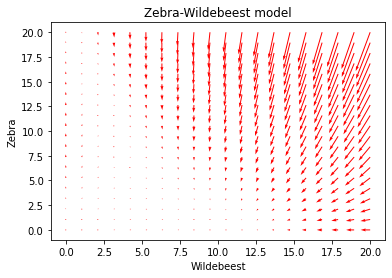

In [4]:
W, Z = np.meshgrid(np.linspace(0, 20, 20), np.linspace(0,20,20))
dW = W*(1.05 - 0.1*W - 0.025*Z)
dZ = Z*(1.1 - 0.05*Z - 0.2*W)
plt.quiver(W, Z, dW, dZ, color='red')
plt.title("Zebra-Wildebeest model")
plt.xlabel("Wildebeest")
plt.ylabel("Zebra")
plt.show()

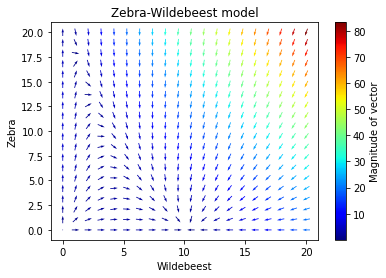

In [5]:
N = np.hypot(dW, dZ)
N[N == 0] = 1

W_Normal = dW / N
Z_Normal = dZ / N

plt.quiver(W, Z, W_Normal, Z_Normal, N, cmap='jet', pivot = 'mid')
plt.title("Zebra-Wildebeest model")
plt.xlabel("Wildebeest")
plt.ylabel("Zebra")
plt.colorbar().set_label("Magnitude of vector")
plt.show()

While the computational methods are completely analagous to the ones used in the first exercise, the result certainly aren't. The zebra population can only increase when the wildebeest population is very small, eventually the increased zebra population will lead to an increase of wildebeest. However, all vectors lead to one point, being <b>(10, 0)</b>. This means that the zebra population will, no matter the initial conditions, eventually start decreasing and falling to zero. The zebra's will go extinct, while the wildebeest population will stay constant.